In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
df = pd.read_csv('/content/laptop_price.csv',encoding = 'latin-1')

In [ ]:
df['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [ ]:
df['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

In [ ]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [ ]:
df = df.join(pd.get_dummies(df['Company'])).drop('Company',axis = 1)

In [ ]:
df = df.join(pd.get_dummies(df['OpSys'])).drop('OpSys',axis = 1)

In [ ]:
df = df.join(pd.get_dummies(df['TypeName'])).drop('TypeName',axis = 1)

In [ ]:
df

,laptop_ID,Product,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price_euros,...,Windows 10,Windows 10 S,Windows 7,macOS,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
0,1,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,1.37kg,1339.69,...,0,0,0,1,0,0,0,0,1,0
1,2,Macbook Air,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,1.34kg,898.94,...,0,0,0,1,0,0,0,0,1,0
2,3,250 G6,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,1.86kg,575.00,...,0,0,0,0,0,0,0,1,0,0
3,4,MacBook Pro,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,1.83kg,2537.45,...,0,0,0,1,0,0,0,0,1,0
4,5,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,1.37kg,1803.60,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Yoga 500-14ISK,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,1.8kg,638.00,...,1,0,0,0,1,0,0,0,0,0
1299,1317,Yoga 900-13ISK,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,1.3kg,1499.00,...,1,0,0,0,1,0,0,0,0,0
1300,1318,IdeaPad 100S-14IBR,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,1.5kg,229.00,...,1,0,0,0,0,0,0,1,0,0
1301,1319,15-AC110nv (i7-6500U/6GB/1TB/Radeon,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,2.19kg,764.00,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
df.drop('laptop_ID',axis = 1, inplace = True)

In [ ]:
df['Ram'].value_counts()

8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: Ram, dtype: int64

In [ ]:
df['Ram']  = df['Ram'].apply(lambda x: x[:-2])

In [ ]:
df['Ram'] = df['Ram'].apply(lambda x: int(x))

In [ ]:
df['memory_type'] = df['Memory'].apply(lambda x:  x.split()[0])

In [ ]:
def y(x):
    if 'TB' in x:
        return int(float(x[:-2]) * 1000)
    return int(float(x[:-2]))


df['memory_typ'] = df['memory_type'].apply(y)

In [ ]:
df.drop('Memory',inplace = True,axis = 1)

In [ ]:
df['Weight'] = df['Weight'].apply(lambda x: float(x[:-2]))

In [ ]:
df

,Product,Inches,ScreenResolution,Cpu,Ram,Gpu,Weight,Price_euros,Acer,Apple,...,Windows 7,macOS,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,memory_type,memory_typ
0,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,1.37,1339.69,0,1,...,0,1,0,0,0,0,1,0,128GB,128
1,Macbook Air,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,1.34,898.94,0,1,...,0,1,0,0,0,0,1,0,128GB,128
2,250 G6,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,1.86,575.00,0,0,...,0,0,0,0,0,1,0,0,256GB,256
3,MacBook Pro,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,1.83,2537.45,0,1,...,0,1,0,0,0,0,1,0,512GB,512
4,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,1.37,1803.60,0,1,...,0,1,0,0,0,0,1,0,256GB,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Yoga 500-14ISK,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,1.80,638.00,0,0,...,0,0,1,0,0,0,0,0,128GB,128
1299,Yoga 900-13ISK,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,1.30,1499.00,0,0,...,0,0,1,0,0,0,0,0,512GB,512
1300,IdeaPad 100S-14IBR,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,1.50,229.00,0,0,...,0,0,0,0,0,1,0,0,64GB,64
1301,15-AC110nv (i7-6500U/6GB/1TB/Radeon,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,2.19,764.00,0,0,...,0,0,0,0,0,1,0,0,1TB,1000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product             1303 non-null   object 
 1   Inches              1303 non-null   float64
 2   ScreenResolution    1303 non-null   object 
 3   Cpu                 1303 non-null   object 
 4   Ram                 1303 non-null   int64  
 5   Gpu                 1303 non-null   object 
 6   Weight              1303 non-null   float64
 7   Price_euros         1303 non-null   float64
 8   Acer                1303 non-null   uint8  
 9   Apple               1303 non-null   uint8  
 10  Asus                1303 non-null   uint8  
 11  Chuwi               1303 non-null   uint8  
 12  Dell                1303 non-null   uint8  
 13  Fujitsu             1303 non-null   uint8  
 14  Google              1303 non-null   uint8  
 15  HP                  1303 non-null   uint8  
 16  Huawei

In [ ]:
df.drop(['memory_type'],axis = 1,inplace = True)

In [ ]:
df['cpu_val'] = df['Cpu'].apply(lambda x: float(x.split()[-1][:-3]))
df['cpu_type'] = df['Cpu'].apply(lambda x: (x.split()[0]))


In [ ]:

df['gpu_type'] = df['Gpu'].apply(lambda x: (x.split()[0]))

In [ ]:
df['gpu_type'] = df['gpu_type'] + '_Gpu'

In [ ]:
df['cpu_type'] = df['cpu_type'] + '_Cpu'

In [ ]:
df.drop('Cpu',axis = 1,inplace = True)
df.drop('Gpu',axis = 1,inplace = True)



In [ ]:
df.drop('Product',axis = 1,inplace = True)

In [ ]:
df['width'] = df['ScreenResolution'].apply(lambda x: float(x.split()[-1][:4]))
df['Height'] = df['ScreenResolution'].apply(lambda x: float(x.split()[-1][5:]))

In [ ]:
df

,Inches,ScreenResolution,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,Netbook,Notebook,Ultrabook,Workstation,memory_typ,cpu_val,cpu_type,gpu_type,width,Height
0,13.3,IPS Panel Retina Display 2560x1600,8,1.37,1339.69,0,1,0,0,0,...,0,0,1,0,128,2.3,Intel_Cpu,Intel_Gpu,2560.0,1600.0
1,13.3,1440x900,8,1.34,898.94,0,1,0,0,0,...,0,0,1,0,128,1.8,Intel_Cpu,Intel_Gpu,1440.0,900.0
2,15.6,Full HD 1920x1080,8,1.86,575.00,0,0,0,0,0,...,0,1,0,0,256,2.5,Intel_Cpu,Intel_Gpu,1920.0,1080.0
3,15.4,IPS Panel Retina Display 2880x1800,16,1.83,2537.45,0,1,0,0,0,...,0,0,1,0,512,2.7,Intel_Cpu,AMD_Gpu,2880.0,1800.0
4,13.3,IPS Panel Retina Display 2560x1600,8,1.37,1803.60,0,1,0,0,0,...,0,0,1,0,256,3.1,Intel_Cpu,Intel_Gpu,2560.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,IPS Panel Full HD / Touchscreen 1920x1080,4,1.80,638.00,0,0,0,0,0,...,0,0,0,0,128,2.5,Intel_Cpu,Intel_Gpu,1920.0,1080.0
1299,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16,1.30,1499.00,0,0,0,0,0,...,0,0,0,0,512,2.5,Intel_Cpu,Intel_Gpu,3200.0,1800.0
1300,14.0,1366x768,2,1.50,229.00,0,0,0,0,0,...,0,1,0,0,64,1.6,Intel_Cpu,Intel_Gpu,1366.0,768.0
1301,15.6,1366x768,6,2.19,764.00,0,0,0,0,0,...,0,1,0,0,1000,2.5,Intel_Cpu,AMD_Gpu,1366.0,768.0


In [ ]:
df.drop('ScreenResolution',axis = 1,inplace = True)

In [ ]:
df = df.join(pd.get_dummies(df['cpu_type'])).drop('cpu_type',axis = 1)

In [ ]:
df = df.join(pd.get_dummies(df['gpu_type']))

In [ ]:
df.drop('gpu_type',axis = 1,inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Inches              1303 non-null   float64
 1   Ram                 1303 non-null   int64  
 2   Weight              1303 non-null   float64
 3   Price_euros         1303 non-null   float64
 4   Acer                1303 non-null   uint8  
 5   Apple               1303 non-null   uint8  
 6   Asus                1303 non-null   uint8  
 7   Chuwi               1303 non-null   uint8  
 8   Dell                1303 non-null   uint8  
 9   Fujitsu             1303 non-null   uint8  
 10  Google              1303 non-null   uint8  
 11  HP                  1303 non-null   uint8  
 12  Huawei              1303 non-null   uint8  
 13  LG                  1303 non-null   uint8  
 14  Lenovo              1303 non-null   uint8  
 15  MSI                 1303 non-null   uint8  
 16  Mediac

(array([474., 448., 231.,  98.,  37.,   8.,   3.,   2.,   1.,   1.]),
 array([ 174. ,  766.5, 1359. , 1951.5, 2544. , 3136.5, 3729. , 4321.5,
        4914. , 5506.5, 6099. ]),
 <BarContainer object of 10 artists>)

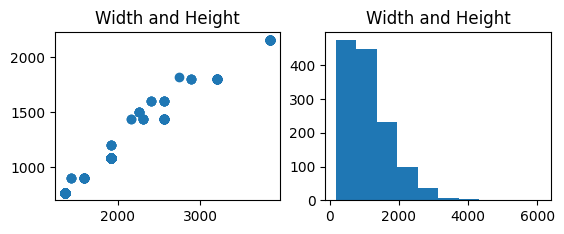

In [ ]:
plt.subplot(2,2,1)
plt.title('Width and Height')
plt.scatter(df['width'],df['Height'])


plt.subplot(2,2,2)
plt.title('Width and Height')
plt.hist(df['Price_euros'])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


In [ ]:
x,y = df.drop('Price_euros',axis = 1), df['Price_euros']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [ ]:
x, y = df.drop('Price_euros',axis = 1), df['Price_euros']

scaler = StandardScaler()
x = scaler.fit_transform(x)
model = RandomForestRegressor()
model.fit(x_train,y_train)


RandomForestRegressor()

In [ ]:
model.score(x_test,y_test)
y_pred = model.predict(x_test)



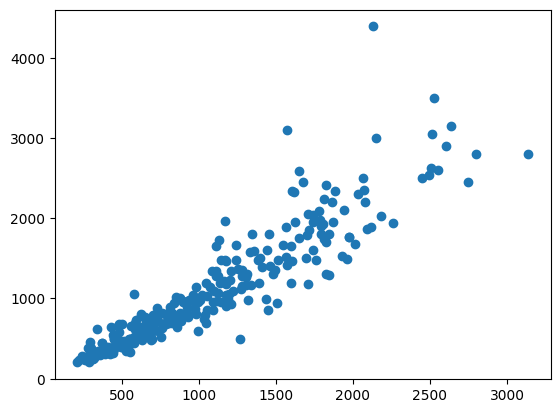

In [ ]:
plt.figure()
plt.scatter(y_pred,y_test)

Mean Squared Error: 88698.1205695767


In [ ]:
score = model.score(x_test,y_test)

In [ ]:
score

0.8268685131891249